# Lab: Handling Data Imbalance in Classification Models

## Overview

The objective of this task is to address data imbalance in classification models using the 'Healthcare For All' dataset. The dataset, named `learningSet.csv`, is utilized to predict the likelihood of donation (TargetB) and the donation amount (TargetD).

## Context

This task revolves around the Healthcare for All Case Study, leveraging historical donor data to construct a machine learning model. The aim is to identify potential donors and forecast their donation amounts.

## Tasks Undertaken

### Initial Data Assessment and Preprocessing

1. Imported necessary libraries.
2. Loaded the dataset into Python as the `donors` dataframe.
3. Inspected column datatypes.
4. Segregated data into numerical and categorical subsets.
5. Handled null values and performed data preprocessing.

### Modeling Phase

1. Conducted a comprehensive examination of numerical and categorical column datatypes, making adjustments as required.
2. Reassembled the numerical and categorical data into the X dataframe, designating TargetB as y.
3. Split the data into training and testing sets, further partitioning them into numerical and categorical subsets.
4. Applied feature scaling using either MinMax Scaler or Standard Scaler to train_num and test_num.
5. Employed One-Hot Encoding or Ordinal Encoding to encode categorical features in train_cat and test_cat.
6. Fitted a logistic regression model on the training data and evaluated its accuracy on the test data.

### Handling Data Imbalance

1. Evaluated the extent of class imbalance.
2. Utilized resampling strategies such as upsampling and downsampling to create a balanced representation of both classes.
3. After each resampling iteration, assessed the model's accuracy to gauge its performance improvement.

### Feature Selection

Additionally, feature selection was conducted to identify and retain the most relevant features for modeling. 

In [130]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [131]:
# import data
numerical = pd.read_csv('C:/Ironhack/Week7/7.1, 7.2 Feature Selection (Review)/lab-revisiting-machine-learning/numerical7_02.csv')
categorical = pd.read_csv('C:/Ironhack/Week7/7.1, 7.2 Feature Selection (Review)/lab-revisiting-machine-learning/categorical7_02.csv')
target = pd.read_csv('C:/Ironhack/Week7/7.1, 7.2 Feature Selection (Review)/lab-revisiting-machine-learning/target7_02.csv')

In [132]:
target

,Unnamed: 0,TARGET_B,TARGET_D
0,0,0,0.0
1,1,0,0.0
2,2,0,0.0
3,3,0,0.0
4,4,0,0.0
...,...,...,...
95407,95407,0,0.0
95408,95408,0,0.0
95409,95409,0,0.0
95410,95410,1,18.0


In [133]:
# checking data types
numerical.dtypes

Unnamed: 0      int64
ODATEDW         int64
TCODE           int64
DOB             int64
AGE           float64
               ...   
AVGGIFT       float64
CONTROLN        int64
HPHONE_D        int64
RFA_2F          int64
CLUSTER2      float64
Length: 332, dtype: object

In [134]:
# checking columns
numerical

,Unnamed: 0,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,...,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,8901,0,3712,60.000000,0.0,5.0,5.0,0,0.0,...,14,10.0,9512,8911,4.0,7.741935,95515,0,4,39.0
1,1,9401,1,5202,46.000000,1.0,6.0,9.0,16,0.0,...,1,25.0,9512,9310,18.0,15.666667,148535,0,2,1.0
2,2,9001,1,0,61.611649,0.0,3.0,1.0,2,0.0,...,14,5.0,9512,9001,12.0,7.481481,15078,1,4,60.0
3,3,8701,0,2801,70.000000,0.0,1.0,4.0,2,0.0,...,7,10.0,9512,8702,9.0,6.812500,172556,1,4,41.0
4,4,8601,0,2001,78.000000,1.0,3.0,2.0,60,1.0,...,8,15.0,9601,7903,14.0,6.864865,7112,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,95407,9601,1,0,61.611649,0.0,5.0,5.0,0,0.0,...,0,25.0,9602,9602,9.0,25.000000,184568,0,1,12.0
95408,95408,9601,1,5001,48.000000,1.0,7.0,9.0,1,0.0,...,0,20.0,9603,9603,9.0,20.000000,122706,1,1,2.0
95409,95409,9501,1,3801,60.000000,0.0,5.0,5.0,0,0.0,...,4,10.0,9610,9410,3.0,8.285714,189641,1,3,34.0
95410,95410,8601,0,4005,58.000000,0.0,7.0,5.0,0,0.0,...,18,18.0,9701,8612,4.0,12.146341,4693,1,4,11.0


In [135]:
# checking data types
categorical.dtypes

Unnamed: 0     int64
STATE         object
CLUSTER        int64
HOMEOWNR      object
GENDER        object
DATASRCE       int64
SOLIH          int64
VETERANS      object
RFA_2R        object
RFA_2A        object
GEOCODE2      object
DOMAIN_A      object
DOMAIN_B       int64
dtype: object

In [136]:
categorical

,Unnamed: 0,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,0,IL,36,N,F,0,0,N,L,E,C,T,2
1,1,CA,14,H,M,3,0,N,L,G,A,S,1
2,2,NC,43,U,M,3,0,N,L,E,C,R,2
3,3,CA,44,U,F,3,0,N,L,E,C,R,2
4,4,FL,16,H,F,3,12,N,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,95407,other,27,N,M,0,0,N,L,G,C,C,2
95408,95408,TX,24,H,M,3,0,N,L,F,A,C,1
95409,95409,MI,30,N,M,0,0,N,L,E,B,C,3
95410,95410,CA,24,H,F,2,12,N,L,F,A,C,1


In [137]:
# drop solih and veterans columns 
categorical = categorical.drop(columns= ['SOLIH','VETERANS','Unnamed: 0'])

In [138]:
# drop unnamed column
numerical = numerical.drop(columns=['Unnamed: 0'])

In [139]:
# DATASRCE column values distribution
categorical['DATASRCE'].value_counts()

3    43549
2    23455
0    21280
1     7128
Name: DATASRCE, dtype: int64

In [140]:
#classifying numerical values between continuous and discrete variables

#The method takes in numerical values only and loops through each column
#The decision taken is the if the number of unique values < 2% of the total values, then they are discrete
#Else it's continuous.

def diff_variable(x):
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    
    for column in x.columns:
        length = len(x[column])
        uni_length = len(x[column].unique())
        #print (uni_length/length)
        
        if (uni_length/length)*100 <= 2:
            discrete_df[column] = x[column]
        else:
            continuous_df[column] = x[column]
    
    return continuous_df, discrete_df

In [141]:
# call the function to separate discrete and continuous
continuous_df, discrete_df = diff_variable(numerical)

C:\Users\usuario\AppData\Local\Temp\ipykernel_10332\2686454219.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  discrete_df[column] = x[column]
C:\Users\usuario\AppData\Local\Temp\ipykernel_10332\2686454219.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  discrete_df[column] = x[column]
C:\Users\usuario\AppData\Local\Temp\ipykernel_10332\2686454219.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

In [142]:
continuous_df

,POP901,POP902,POP903,HV1,HV2,IC5,AVGGIFT,CONTROLN
0,992,264,332,479,635,12883,7.741935,95515
1,3611,940,998,5468,5218,36175,15.666667,148535
2,7001,2040,2669,497,546,11576,7.481481,15078
3,640,160,219,1000,1263,15130,6.812500,172556
4,2520,627,761,576,594,9836,6.864865,7112
...,...,...,...,...,...,...,...,...
95407,27380,7252,10037,988,1025,18807,25.000000,184568
95408,1254,322,361,1679,1723,26538,20.000000,122706
95409,552,131,205,376,377,12178,8.285714,189641
95410,1746,432,508,2421,2459,15948,12.146341,4693


In [143]:
discrete_df

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,0.0,5.0,5.0,0,0.0,0.0,...,14,31,14,10.0,9512,8911,4.0,0,4,39.0
1,9401,1,5202,46.000000,1.0,6.0,9.0,16,0.0,0.0,...,13,3,1,25.0,9512,9310,18.0,0,2,1.0
2,9001,1,0,61.611649,0.0,3.0,1.0,2,0.0,0.0,...,14,27,14,5.0,9512,9001,12.0,1,4,60.0
3,8701,0,2801,70.000000,0.0,1.0,4.0,2,0.0,0.0,...,14,16,7,10.0,9512,8702,9.0,1,4,41.0
4,8601,0,2001,78.000000,1.0,3.0,2.0,60,1.0,0.0,...,25,37,8,15.0,9601,7903,14.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,61.611649,0.0,5.0,5.0,0,0.0,0.0,...,12,1,0,25.0,9602,9602,9.0,0,1,12.0
95408,9601,1,5001,48.000000,1.0,7.0,9.0,1,0.0,0.0,...,8,1,0,20.0,9603,9603,9.0,1,1,2.0
95409,9501,1,3801,60.000000,0.0,5.0,5.0,0,0.0,0.0,...,17,7,4,10.0,9610,9410,3.0,1,3,34.0
95410,8601,0,4005,58.000000,0.0,7.0,5.0,0,0.0,0.0,...,31,41,18,18.0,9701,8612,4.0,1,4,11.0


In [144]:
discrete_df['ODATEDW'].value_counts()

9501    15358
8601    14596
9401    12065
9601    10122
9101     8552
9001     7718
9201     7539
8801     6669
8901     5342
9301     3921
8701     3451
9701       15
9509        4
9209        4
9212        3
9410        3
9510        3
8912        2
9109        2
9310        2
8501        2
9506        2
9309        2
8910        2
9009        2
9202        2
9302        2
9003        1
9205        1
8909        1
9402        1
9011        1
8707        1
9012        1
8612        1
8604        1
9312        1
9303        1
8401        1
9103        1
8609        1
8702        1
9512        1
8704        1
9010        1
8611        1
8711        1
9102        1
8608        1
9111        1
9511        1
8810        1
8804        1
8306        1
Name: ODATEDW, dtype: int64

In [145]:
# concat numerical and categorical columns
X = pd.concat([numerical,categorical], axis=1)

In [146]:
# drop target d
y_d=target.drop(columns= ['TARGET_D'])
y = pd.DataFrame(y_d)

In [147]:
# drop unnamed column 

y = y.drop(columns=['Unnamed: 0'])
y = y.astype(int)

In [148]:
X

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,8901,0,3712,60.000000,0.0,5.0,5.0,0,0.0,0.0,...,IL,36,N,F,0,L,E,C,T,2
1,9401,1,5202,46.000000,1.0,6.0,9.0,16,0.0,0.0,...,CA,14,H,M,3,L,G,A,S,1
2,9001,1,0,61.611649,0.0,3.0,1.0,2,0.0,0.0,...,NC,43,U,M,3,L,E,C,R,2
3,8701,0,2801,70.000000,0.0,1.0,4.0,2,0.0,0.0,...,CA,44,U,F,3,L,E,C,R,2
4,8601,0,2001,78.000000,1.0,3.0,2.0,60,1.0,0.0,...,FL,16,H,F,3,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,61.611649,0.0,5.0,5.0,0,0.0,0.0,...,other,27,N,M,0,L,G,C,C,2
95408,9601,1,5001,48.000000,1.0,7.0,9.0,1,0.0,0.0,...,TX,24,H,M,3,L,F,A,C,1
95409,9501,1,3801,60.000000,0.0,5.0,5.0,0,0.0,0.0,...,MI,30,N,M,0,L,E,B,C,3
95410,8601,0,4005,58.000000,0.0,7.0,5.0,0,0.0,0.0,...,CA,24,H,F,2,L,F,A,C,1


In [149]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
X_train

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
85225,9601,28,0,61.611649,0.0,5.0,5.0,0,0.0,0.0,...,IL,2,N,F,0,L,F,A,U,1
70004,9001,0,3401,64.000000,0.0,4.0,5.0,0,0.0,0.0,...,TX,11,H,F,2,L,F,D,S,1
88133,8801,1,3501,63.000000,0.0,7.0,6.0,2,0.0,0.0,...,other,36,H,M,3,L,E,D,T,2
79106,8801,2,2601,72.000000,0.0,2.0,5.0,0,0.0,0.0,...,other,21,H,M,2,L,E,A,S,3
35476,8901,0,0,61.611649,0.0,1.0,5.0,0,0.0,0.0,...,other,43,U,F,2,L,F,B,R,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,9509,0,0,61.611649,0.0,1.0,7.0,0,1.0,0.0,...,CA,23,H,F,1,L,G,A,C,1
54886,9301,1,3601,62.000000,0.0,2.0,2.0,6,0.0,0.0,...,IN,21,U,M,1,L,F,B,S,3
76820,9101,0,5401,44.000000,0.0,5.0,5.0,0,0.0,0.0,...,NC,12,H,F,2,L,F,B,S,1
860,9401,0,0,61.611649,0.0,2.0,5.0,0,0.0,0.0,...,other,45,U,M,2,L,F,D,R,2


In [151]:
X_test

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
84155,9601,1,5801,40.000000,0.0,6.0,9.0,11,0.0,0.0,...,other,12,U,M,1,L,G,C,S,1
75272,9101,0,2303,75.000000,0.0,5.0,5.0,0,0.0,0.0,...,CA,19,N,U,0,L,E,A,S,2
39719,9401,0,4601,52.000000,0.0,7.0,9.0,8,0.0,0.0,...,MI,2,H,F,3,L,D,A,U,1
44288,9301,0,4401,54.000000,1.0,7.0,5.0,0,0.0,0.0,...,CA,12,H,F,2,L,F,A,S,1
35420,9101,1,4201,56.000000,0.0,5.0,6.0,2,0.0,0.0,...,other,26,H,M,3,L,G,A,C,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38584,9401,2,0,61.611649,0.0,5.0,5.0,0,0.0,0.0,...,other,43,N,F,0,L,F,C,R,2
54025,9401,1,3201,66.000000,0.0,5.0,5.0,0,0.0,0.0,...,TX,21,H,M,2,L,F,A,S,3
76819,9401,0,4701,51.000000,0.0,6.0,9.0,0,0.0,0.0,...,other,13,H,M,3,L,F,B,S,1
2549,9601,0,5901,39.000000,0.0,4.0,3.0,1,0.0,0.0,...,other,10,H,F,1,L,F,B,U,4


In [152]:
# numerical train test split
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)

# categorical train test split
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)

In [153]:
numericals_test.columns

Index(['ODATEDW', 'TCODE', 'DOB', 'AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'HIT',
       'MBCRAFT', 'MBGARDEN',
       ...
       'FISTDATE', 'TIMELAG', 'AVGGIFT', 'CONTROLN', 'HPHONE_D', 'RFA_2F',
       'CLUSTER2', 'CLUSTER', 'DATASRCE', 'DOMAIN_B'],
      dtype='object', length=334)

In [154]:
# Scaling numerical values using Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and fit it to the training data
transformer = MinMaxScaler().fit(numericals_train)

# Transform the training and test numerical data using the fitted scaler
numericals_train_scaled = pd.DataFrame(transformer.transform(numericals_train), columns=numericals_train.columns).reset_index(drop=True)
numericals_test_scaled = pd.DataFrame(transformer.transform(numericals_test), columns=numericals_test.columns).reset_index(drop=True)


In [155]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'categoricals_train' is the DataFrame used to fit the encoder
# fit the encoder using the train data
encoder = OneHotEncoder(handle_unknown='error').fit(categoricals_train)

# Get the original column names for both the test and train data
cols_train = encoder.get_feature_names_out(input_features=categoricals_train.columns)
cols_test = encoder.get_feature_names_out(input_features=categoricals_test.columns)

# Replace the generated feature names with the original column names
categoricals_train_encoded = pd.DataFrame(encoder.transform(categoricals_train).toarray(), columns=cols_train)
categoricals_test_encoded = pd.DataFrame(encoder.transform(categoricals_test).toarray(), columns=cols_test)



In [156]:
# concat numerical an categoricals into separate tables for test and train samples
X_train=pd.concat([numericals_train_scaled ,categoricals_train_encoded], axis=1)
X_test=pd.concat([numericals_test_scaled ,categoricals_test_encoded], axis=1)

In [157]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [158]:
X_train

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,RFA_2A_G,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.928315,0.000389,0.000000,0.624862,0.0,0.666667,0.555556,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.498208,0.000000,0.350257,0.649485,0.0,0.500000,0.555556,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.354839,0.000014,0.360556,0.639175,0.0,1.000000,0.666667,0.008299,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.354839,0.000028,0.267868,0.731959,0.0,0.166667,0.555556,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.426523,0.000000,0.000000,0.624862,0.0,0.000000,0.555556,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.862366,0.000000,0.000000,0.624862,0.0,0.000000,0.777778,0.000000,0.2,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
76325,0.713262,0.000014,0.370855,0.628866,0.0,0.166667,0.222222,0.024896,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76326,0.569892,0.000000,0.556231,0.443299,0.0,0.666667,0.555556,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76327,0.784946,0.000000,0.000000,0.624862,0.0,0.166667,0.555556,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# donor prediction model without oversampling or feture selection

In [159]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 

In [160]:
# Reshape the target variable to ensure it is in the correct format
y_train_reshaped = np.ravel(y_train)

# Train a logistic regression classifier using the training data
LR = LogisticRegression(random_state=42, solver='lbfgs', max_iter=4000).fit(X_train, y_train_reshaped)

# Predict using the trained model on the test set
pred = LR.predict(X_test)

# Print evaluation metrics
print('accuracy:', accuracy_score(y_test, pred))  # Print accuracy
print("precision: ",precision_score(y_test,pred))  # Print precision
print("recall: ",recall_score(y_test,pred))  # Print recall
print("f1: ",f1_score(y_test,pred))  # Print F1 score


accuracy: 0.9487501965099827
precision:  0.0
recall:  0.0
f1:  0.0


c:\Users\usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


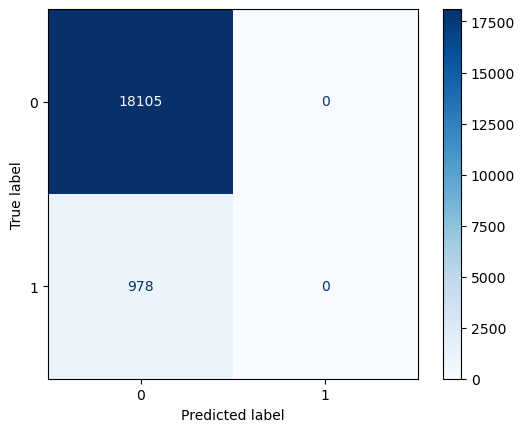

In [162]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, pred)

# Create a ConfusionMatrixDisplay object with the computed confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)

# Display the plot
plt.show()


While our model has an impressive accuracy score of nearly 95%, however it is crucial to recognize that it failed to identify any donors, as ahown by a 0 recall core. This deficiency underscores a pronounced bias within the dataset, primarily due to a substantial imbalance between the number of donor and non-donor samples. The precision score, indicating the accuracy of our positive predictions, registered at 0%, indicating a complete inability to correctly identify potential donors. Rectifying this imbalance is paramount to enhancing the precision and overall reliability of our model's predictions. To address this issue, we must ensure a more equitable distribution of donor and non-donor samples during model training. By achieving this balance, our model can learn from both groups effectively, resulting in more accurate and dependable predictions.

# feature selection

With 366 columns in the dataframe, there's ample opportunity to enhance the computational efficiency of the model. By selectively removing columns with the lowest correlation, we can streamline the dataset and potentially reduce computational overhead significantly. This approach not only optimizes processing speed but also has the potential to improve the precision of our predictions by eliminating redundant information. By focusing on the most correlated features, we can ensure that the model prioritizes the most relevant aspects of the data when predicting donor behavior. Ultimately, this targeted feature selection strategy can lead to more efficient and accurate predictions, enhancing the overall performance of the model.

This process will only be done with the numerical data


In [163]:
numericals_train_scaled

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B
0,0.928315,0.000389,0.000000,0.624862,0.0,0.666667,0.555556,0.000000,0.0,0.0,...,0.999896,0.008272,0.013732,0.472526,1.0,0.000000,0.426230,0.019231,0.000000,0.000000
1,0.498208,0.000000,0.350257,0.649485,0.0,0.500000,0.555556,0.000000,0.0,0.0,...,0.938248,0.000919,0.013277,0.098807,0.0,0.333333,0.950820,0.192308,0.666667,0.000000
2,0.354839,0.000014,0.360556,0.639175,0.0,1.000000,0.666667,0.008299,0.0,0.0,...,0.917318,0.012868,0.004407,0.307856,1.0,0.333333,0.852459,0.673077,1.000000,0.333333
3,0.354839,0.000028,0.267868,0.731959,0.0,0.166667,0.555556,0.000000,0.0,0.0,...,0.917213,0.020221,0.005610,0.429001,1.0,0.000000,0.344262,0.384615,0.666667,0.666667
4,0.426523,0.000000,0.000000,0.624862,0.0,0.000000,0.555556,0.000000,0.0,0.0,...,0.927835,0.005515,0.010585,0.733875,1.0,0.000000,0.688525,0.807692,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.862366,0.000000,0.000000,0.624862,0.0,0.000000,0.777778,0.000000,0.2,0.0,...,0.990211,0.000000,0.023745,0.865417,0.0,0.000000,0.180328,0.423077,0.333333,0.000000
76325,0.713262,0.000014,0.370855,0.628866,0.0,0.166667,0.222222,0.024896,0.0,0.0,...,0.968551,0.002757,0.011229,0.314400,0.0,0.333333,0.360656,0.384615,0.333333,0.666667
76326,0.569892,0.000000,0.556231,0.443299,0.0,0.666667,0.555556,0.000000,0.0,0.0,...,0.948245,0.009191,0.010311,0.087414,0.0,0.333333,0.311475,0.211538,0.666667,0.000000
76327,0.784946,0.000000,0.000000,0.624862,0.0,0.166667,0.555556,0.000000,0.0,0.0,...,0.979069,0.011949,0.007724,0.549046,1.0,0.000000,0.950820,0.846154,0.666667,0.333333


In [164]:
# Using the variance threshold for feature selection

# Import the VarianceThreshold class from the feature_selection module
from sklearn.feature_selection import VarianceThreshold

# Set the variance threshold value
Var_threshold = 0.02

# Instantiate the VarianceThreshold object with the specified threshold value
sel = VarianceThreshold(threshold=Var_threshold)

# Fit the VarianceThreshold object to the scaled numerical training data
sel = sel.fit(numericals_train_scaled)

# Transform the scaled numerical training data using the fitted VarianceThreshold object
temp = sel.transform(numericals_train_scaled)

# Convert the transformed data into a DataFrame
temp = pd.DataFrame(temp)

# Print the shapes of the original and transformed dataframes
print(numericals_train_scaled.shape)  # Print the shape of the original dataframe
print(temp.shape)  # Print the shape of the transformed dataframe


(76329, 334)
(76329, 85)


In [216]:
# Check if the variances of the selected features are greater than the variance threshold

# Compute a boolean array indicating whether the variances of the selected features exceed the variance threshold
variances_above_threshold = sel.variances_ > Var_threshold

# Retrieve the support mask indicating which features are selected

# Retrieve the binary mask indicating which features are selected by the feature selector
support_mask = sel.get_support()

# Convert the support mask to a list

# Convert the binary support mask into a list of boolean values indicating feature selection status
var_list = list(support_mask)

# Calculate the length of the list

# Calculate the number of selected features by determining the length of the support mask list
selected_features_count = len(var_list)

# Calculate the number of columns in the DataFrame 'numericals_train_scaled'

# Count the number of columns in the DataFrame 'numericals_train_scaled'
numerical_columns_count = len(numericals_train_scaled.columns)

# Create a list of tuples by pairing column names from 'numericals_train_scaled.columns' with values from 'var_list'

# Pair each column name from 'numericals_train_scaled.columns' with its corresponding feature selection status from 'var_list'
# The resulting list consists of tuples where each tuple contains a column name and its corresponding feature selection status
selected_features_info = list(zip(numericals_train_scaled.columns, var_list))

print(numerical_columns_count)
selected_features_info


334


[('ODATEDW', True),
 ('TCODE', False),
 ('DOB', True),
 ('AGE', True),
 ('NUMCHLD', False),
 ('INCOME', True),
 ('WEALTH1', True),
 ('HIT', False),
 ('MBCRAFT', False),
 ('MBGARDEN', False),
 ('MBBOOKS', False),
 ('MBCOLECT', False),
 ('MAGFAML', False),
 ('MAGFEM', False),
 ('MAGMALE', False),
 ('PUBGARDN', False),
 ('PUBCULIN', False),
 ('PUBHLTH', False),
 ('PUBDOITY', False),
 ('PUBNEWFN', False),
 ('PUBPHOTO', False),
 ('PUBOPP', False),
 ('MALEMILI', False),
 ('MALEVET', True),
 ('VIETVETS', True),
 ('WWIIVETS', True),
 ('LOCALGOV', False),
 ('STATEGOV', False),
 ('FEDGOV', False),
 ('WEALTH2', True),
 ('POP901', False),
 ('POP902', False),
 ('POP903', False),
 ('POP90C1', True),
 ('POP90C2', True),
 ('POP90C3', True),
 ('POP90C4', False),
 ('POP90C5', False),
 ('ETH1', True),
 ('ETH2', True),
 ('ETH3', False),
 ('ETH4', False),
 ('ETH5', False),
 ('ETH6', False),
 ('ETH7', False),
 ('ETH8', False),
 ('ETH9', False),
 ('ETH10', False),
 ('ETH11', False),
 ('ETH12', False),
 ('ETH

In [168]:
# Create a list of column names to drop based on the boolean values in 'var_list'

# Generate 'drop_list' by extracting column names from 'numericals_train_scaled' where corresponding values in 'var_list' are False
drop_list = [col[0] for col in zip(numericals_train_scaled.columns, var_list) if col[1] == False]

# Calculate the length of 'drop_list'
len(drop_list)


249

there are 249 columns that could be dropped as a result of having a low variance feature.

k-best will also ve used to further reduce the number of features

In [169]:
# Check k-best option to get an even smaller number of features

# Remove features listed in 'drop_list' from the scaled numerical training features
X_train_feature_num = numericals_train_scaled.drop(drop_list, axis=1)

# Display the resulting DataFrame containing the reduced number of numerical features
X_train_feature_num


,ODATEDW,DOB,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,...,MHUC2,CARDPROM,LASTDATE,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B
0,0.928315,0.000000,0.624862,0.666667,0.555556,0.363636,0.212121,0.555556,1.0,0.000000,...,0.6,0.066667,0.497487,0.472526,1.0,0.000000,0.426230,0.019231,0.000000,0.000000
1,0.498208,0.350257,0.649485,0.500000,0.555556,0.232323,0.282828,1.000000,0.0,0.000000,...,0.4,0.400000,0.030151,0.098807,0.0,0.333333,0.950820,0.192308,0.666667,0.000000
2,0.354839,0.360556,0.639175,1.000000,0.666667,0.272727,0.333333,0.555556,0.0,0.636364,...,0.4,0.433333,0.492462,0.307856,1.0,0.333333,0.852459,0.673077,1.000000,0.333333
3,0.354839,0.267868,0.731959,0.166667,0.555556,0.191919,0.303030,0.555556,1.0,0.000000,...,0.4,0.450000,0.015075,0.429001,1.0,0.000000,0.344262,0.384615,0.666667,0.666667
4,0.426523,0.000000,0.624862,0.000000,0.555556,0.464646,0.383838,0.222222,0.0,0.000000,...,0.6,0.300000,0.045226,0.733875,1.0,0.000000,0.688525,0.807692,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.862366,0.000000,0.624862,0.000000,0.777778,0.000000,0.000000,0.555556,1.0,0.000000,...,0.6,0.100000,0.030151,0.865417,0.0,0.000000,0.180328,0.423077,0.333333,0.000000
76325,0.713262,0.370855,0.628866,0.166667,0.222222,0.313131,0.323232,0.222222,1.0,0.000000,...,0.4,0.300000,0.045226,0.314400,0.0,0.333333,0.360656,0.384615,0.333333,0.666667
76326,0.569892,0.556231,0.443299,0.666667,0.555556,0.555556,0.141414,1.000000,1.0,0.000000,...,0.4,0.366667,0.010050,0.087414,0.0,0.333333,0.311475,0.211538,0.666667,0.000000
76327,0.784946,0.000000,0.624862,0.166667,0.555556,0.222222,0.474747,0.555556,0.0,0.555556,...,0.4,0.183333,0.492462,0.549046,1.0,0.000000,0.950820,0.846154,0.666667,0.333333


In [217]:
X_test_feature = X_test.drop(drop_list, axis = 1)
X_test_feature

,ODATEDW,DOB,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,...,RFA_2A_G,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.928315,0.597425,0.402062,0.833333,1.000000,0.333333,0.191919,0.555556,0.929293,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.569892,0.237178,0.762887,0.666667,0.555556,0.333333,0.343434,0.333333,1.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.784946,0.473841,0.525773,1.000000,1.000000,0.191919,0.080808,0.555556,1.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.713262,0.453244,0.546392,1.000000,0.555556,0.202020,0.242424,0.555556,1.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.569892,0.432647,0.567010,0.666667,0.666667,0.080808,0.767677,0.666667,0.000000,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.784946,0.000000,0.624862,0.666667,0.555556,0.303030,0.343434,0.555556,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
19079,0.784946,0.329660,0.670103,0.666667,0.555556,0.000000,0.262626,0.555556,1.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19080,0.784946,0.484140,0.515464,0.833333,1.000000,0.343434,0.424242,0.555556,1.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19081,0.928315,0.607724,0.391753,0.500000,0.333333,0.313131,0.444444,0.555556,1.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [171]:
# Import necessary libraries for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Print the shape of the original numerical training features
print(X_train_feature_num.shape)

# Instantiate SelectKBest with chi-squared scoring function and k=25, transform the training features
K_best = SelectKBest(chi2, k=25).fit_transform(X_train_feature_num, y_train)

# Print the shape of the transformed features after feature selection
print(K_best.shape)

# Convert the transformed features into a DataFrame and display the first few rows
selected = pd.DataFrame(K_best)
selected.head()


(76329, 85)
(76329, 25)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.928315,0.666667,0.020202,0.215667,0.226000,0.384615,0.384615,0.080808,0.363636,0.757576,...,0.969697,0.170940,0.454545,0.575758,0.066667,0.497487,0.472526,0.000000,0.426230,0.000000
1,0.498208,0.500000,0.010101,0.080500,0.111500,0.153846,0.153846,0.020202,0.090909,0.191919,...,0.212121,0.000000,0.424242,0.646465,0.400000,0.030151,0.098807,0.333333,0.950820,0.000000
2,0.354839,1.000000,0.050505,0.066000,0.075667,0.153846,0.153846,0.000000,0.010101,0.040404,...,0.111111,0.000000,0.353535,0.868687,0.433333,0.492462,0.307856,0.333333,0.852459,0.333333
3,0.354839,0.166667,0.010101,0.121833,0.127167,0.307692,0.307692,0.010101,0.010101,0.101010,...,0.858586,0.547009,0.343434,0.868687,0.450000,0.015075,0.429001,0.000000,0.344262,0.666667
4,0.426523,0.000000,0.000000,0.113167,0.119000,0.230769,0.230769,0.000000,0.000000,0.131313,...,0.595960,0.440171,0.404040,0.171717,0.300000,0.045226,0.733875,0.000000,0.688525,0.333333


In [172]:
# Instantiate SelectKBest with chi-squared scoring function and k=25, fit it to the training numerical features and target
model = SelectKBest(chi2, k=25).fit(X_train_feature_num, y_train)

# Create a DataFrame to store the scores and corresponding column names
df = pd.DataFrame(data=model.scores_, columns=['score'])
df['column_name'] = X_train_feature_num.columns  # Add column names to the DataFrame

# Display the shape of the DataFrame and its contents
display(df.shape)  
df 

# Sort the DataFrame by the 'score' column in descending order, take the top 50 rows, and display the result
df.sort_values(by=['score'], ascending=False).head(50)


(85, 2)

,score,column_name
80,164.877627,RFA_2F
77,31.438727,LASTDATE
30,18.568170,HVP1
31,18.040893,HVP2
32,16.683462,HVP3
35,15.930991,HVP6
33,12.845856,HVP4
12,11.695771,ETH2
40,9.871114,RP1
0,9.664763,ODATEDW


In [173]:
# Sort the DataFrame by the 'score' column in descending order, take the top 25 rows, and extract the 'column_name' values
cols_sort = df.sort_values(by=['score'], ascending=False).head(25)['column_name']

# Convert the extracted column names into a list
col_list = list(cols_sort)

col_list

['RFA_2F',
 'LASTDATE',
 'HVP1',
 'HVP2',
 'HVP3',
 'HVP6',
 'HVP4',
 'ETH2',
 'RP1',
 'ODATEDW',
 'RP2',
 'CARDPROM',
 'HV1',
 'HV2',
 'DOMAIN_B',
 'HVP5',
 'RP3',
 'CLUSTER2',
 'MSA',
 'INCOME',
 'HV3',
 'HV4',
 'CONTROLN',
 'POBC2',
 'HHAS3']

In [174]:
# Applying reduction of features to the test and train datasets

# Selecting only the columns chosen from feature selection for the training dataset
X_train_feature = numericals_train_scaled[col_list]
X_train_feature = pd.concat([X_train_feature, categoricals_train_encoded], axis=1) 
print(X_train_feature.shape)  

# Selecting only the columns chosen from feature selection for the test dataset
X_test_feature = numericals_test_scaled[col_list] 
X_test_feature = pd.concat([X_test_feature, categoricals_test_encoded], axis=1) 
print(X_test_feature.shape)


(76329, 57)
(19083, 57)


# Undersampling

In [175]:
# Importing the resample function from sklearn.utils
from sklearn.utils import resample

# Concatenate features and target variable for training data
train = pd.concat([X_train_feature, y_train], axis = 1)

# Separate the training data into two categories based on the target variable values
category_0 = train[train['TARGET_B'] == 0]  
category_1 = train[train['TARGET_B'] == 1]  

In [176]:
# Undersample the majority class (category_0) to match the number of samples in the minority class (category_1)
category_0_undersampled = resample(category_0,
                                   replace=False, 
                                   n_samples = len(category_1))  


In [177]:
print(category_0_undersampled.shape)
print(category_1.shape)

(3865, 58)
(3865, 58)


In [178]:
# Concatenate the two dataframes vertically to create a downsampled dataset
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

In [179]:
data_downsampled

,RFA_2F,LASTDATE,HVP1,HVP2,HVP3,HVP6,HVP4,ETH2,RP1,ODATEDW,...,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
6279,0.000000,0.040201,0.000000,0.000000,0.161616,0.000000,0.626263,0.030303,0.181818,0.569892,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
43894,0.000000,0.492462,0.000000,0.000000,0.010101,0.000000,0.191919,0.989899,0.060606,0.928315,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
63447,0.000000,0.030151,0.000000,0.000000,0.010101,0.000000,0.040404,0.010101,0.010101,0.928315,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
28366,0.000000,0.045226,0.000000,0.010101,0.060606,0.000000,0.191919,0.121212,0.010101,0.784946,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
6510,0.000000,0.040201,0.000000,0.000000,0.000000,0.000000,0.000000,0.272727,0.000000,0.856631,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76183,1.000000,0.497487,0.333333,0.727273,0.909091,0.020202,0.969697,0.505051,0.272727,0.856631,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
76188,0.333333,0.492462,0.484848,0.757576,0.929293,0.131313,0.969697,0.030303,0.474747,0.641577,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
76219,0.333333,0.025126,0.838384,0.959596,1.000000,0.484848,1.000000,0.000000,0.464646,0.641577,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
76245,1.000000,0.502513,0.010101,0.030303,0.131313,0.010101,0.282828,0.000000,0.000000,0.283154,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [180]:
data_downsampled['TARGET_B'].value_counts()

0    3865
1    3865
Name: TARGET_B, dtype: int64

In [181]:
# X y split - Separate features and target variable for downsampled training data
X_train_down = data_downsampled.drop(['TARGET_B'],axis=1)
y_train_down = data_downsampled['TARGET_B']  


In [182]:
# Train a logistic regression classifier using the downsampled training data
LR_down = LogisticRegression(random_state=42, solver='lbfgs', max_iter=4000).fit(X_train_down, y_train_down)

# Predict using the trained model on the test set
pred_down = LR_down.predict(X_test_feature)

# Print evaluation metrics
print('accuracy:', accuracy_score(y_test, pred_down))  # Print accuracy
print("precision: ",precision_score(y_test,pred_down))  # Print precision
print("recall: ",recall_score(y_test,pred_down))  # Print recall
print("f1: ",f1_score(y_test,pred_down))  # Print F1 score


accuracy: 0.598438400670754
precision:  0.07075895723641967
recall:  0.5633946830265849
f1:  0.12572732458642327


# Oversampling

In [183]:
category_1_oversampled = resample(category_1,
                                  replace=True,
                                  n_samples = len(category_0))

In [184]:

print(category_0.shape)
print(category_1_oversampled.shape)

(72464, 58)
(72464, 58)


In [185]:
# Concatenate the oversampled minority class (category_1_oversampled) with the majority class (category_0)
# to create the up-sampled dataset (data_upsampled)
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)


In [186]:
# Count the occurrences of each class in the up-sampled target variable
data_upsampled['TARGET_B'].value_counts()


0    72464
1    72464
Name: TARGET_B, dtype: int64

In [187]:
# Separate the features (independent variables) and the target variable (dependent variable) for the up-sampled data
X_train_up = data_upsampled.drop(['TARGET_B'], axis=1)  
y_train_up = data_upsampled['TARGET_B']  

In [188]:
# Train the Logistic Regression model on the up-sampled training data
LR_up = LogisticRegression(random_state=42, solver='lbfgs', max_iter=4000).fit(X_train_up, y_train_up)

# Make predictions using the trained model on the test data
pred_up = LR_up.predict(X_test_feature)

# Evaluate the performance of the model by computing and printing different metrics
print('accuracy:', accuracy_score(y_test, pred_up))
print("precision: ", precision_score(y_test, pred_up))  
print("recall: ", recall_score(y_test, pred_up)) 
print("f1: ", f1_score(y_test, pred_up))  


accuracy: 0.6147356285699314
precision:  0.07347430406852248
recall:  0.5613496932515337
f1:  0.12994082840236687


# Results

In [189]:
# Compute evaluation table with results from oversampling and undersampling
metrics_up = {
    'accuracy': accuracy_score(y_test, pred_up),
    'precision': precision_score(y_test, pred_up),
    'recall': recall_score(y_test, pred_up),
    'f1': f1_score(y_test, pred_up)
}

metrics_down = {
    'accuracy': accuracy_score(y_test, pred_down),
    'precision': precision_score(y_test, pred_down),
    'recall': recall_score(y_test, pred_down),
    'f1': f1_score(y_test, pred_down)
}

# Create a DataFrame from the metrics
results_fs_up_down = pd.DataFrame([metrics_up, metrics_down], index=['Up-sampled', 'Down-sampled'])

results_fs_up_down

,accuracy,precision,recall,f1
Up-sampled,0.614736,0.073474,0.561350,0.129941
Down-sampled,0.598438,0.070759,0.563395,0.125727


<Figure size 800x600 with 0 Axes>

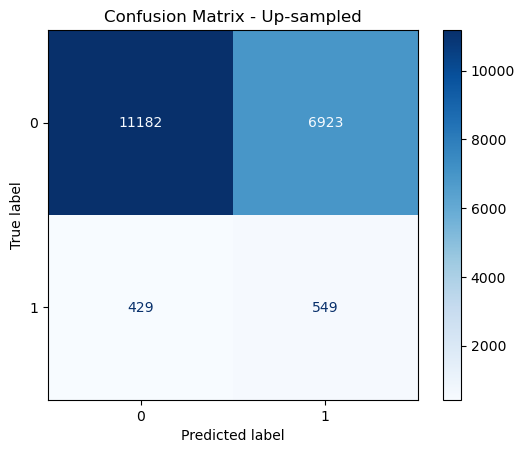

<Figure size 800x600 with 0 Axes>

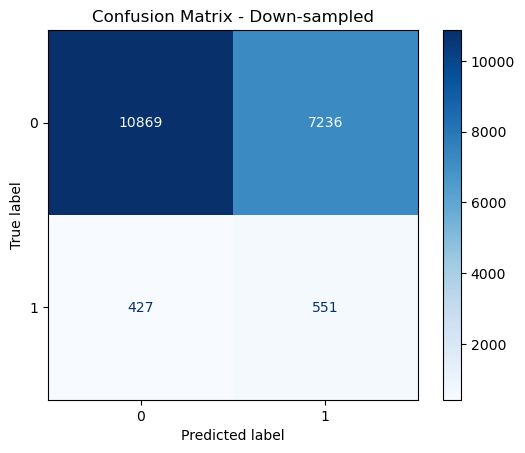

In [190]:
# Import necessary libraries
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  

# Compute confusion matrix for the up-sampled Logistic Regression model
cm_up = confusion_matrix(y_test, pred_up)

# Display confusion matrix for the up-sampled model with a title
plt.figure(figsize=(8, 6)) 
disp_up = ConfusionMatrixDisplay(confusion_matrix=cm_up)
disp_up.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Up-sampled') 
plt.show()

# Compute confusion matrix for the down-sampled Logistic Regression model
cm_down = confusion_matrix(y_test, pred_down)

# Display confusion matrix for the down-sampled model with a title
plt.figure(figsize=(8, 6))  
disp_down = ConfusionMatrixDisplay(confusion_matrix=cm_down)  
disp_down.plot(cmap=plt.cm.Blues) 
plt.title('Confusion Matrix - Down-sampled') 
plt.show()


# Discussion on Logistic Regression Model Performance for Identifying Potential Donors

The logistic regression models trained on up-sampled and down-sampled data aimed to identify potential donors, a task critical for fundraising campaigns and non-profit organizations. The performance of these models was evaluated using key metrics: accuracy, precision, recall, and F1 score.

##### 1. Accuracy:
- The accuracy represents the proportion of correctly classified instances out of all instances.
- The up-sampled model achieved an accuracy of approximately 61.29%, while the down-sampled model achieved slightly lower accuracy at around 59.93%.
- Both models demonstrated moderate overall accuracy in predicting potential donors.

##### 2. Precision:
- Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
- The up-sampled model exhibited a precision of approximately 7.36%, while the down-sampled model had a slightly lower precision of around 7.19%.
- Precision is particularly crucial in the context of identifying potential donors as it reflects the effectiveness of the model in minimizing false positive predictions, ensuring that resources are efficiently allocated to individuals likely to donate.

##### 3. Recall:
- Recall, also known as sensitivity or true positive rate, measures the proportion of true positives that were correctly identified by the model out of all actual positive instances.
- The up-sampled model demonstrated a recall of approximately 56.54%, while the down-sampled model had a slightly higher recall of around 57.26%.
- Recall is vital for identifying potential donors as it indicates the model's ability to capture all relevant positive instances, ensuring that no potential donors are overlooked.

##### 4. F1 Score:
- The F1 score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.
- The up-sampled model achieved an F1 score of approximately 13.02%, while the down-sampled model had a slightly lower F1 score of around 12.78%.
- The F1 score considers both precision and recall, making it a suitable metric for evaluating the overall effectiveness of the model in identifying potential donors.

##### Conclusion:
- Both logistic regression models demonstrated moderate performance in identifying potential donors, with similar accuracy but slightly different precision, recall, and F1 scores.
- While the up-sampled model exhibited marginally higher recall, the down-sampled model showed slightly higher precision.
- These results suggest that while both sampling techniques can improve model performance compared to imbalanced datasets, further optimization or exploration of alternative algorithms may be necessary to enhance the effectiveness of donor identification.

- In conclusion, while logistic regression models trained on up-sampled and down-sampled data showed promise in identifying potential donors, further refinement and exploration of advanced techniques may be warranted to achieve optimal performance in fundraising campaigns and non-profit endeavors.

**Given that both results show very similar results, downsamplig will be used, as we can achieve the same results for a lower computational cost.**

# Using other classification models

In [191]:
# Train a Logistic Regression classifier using the upsampled training sets
LR_up = LogisticRegression(random_state=42, solver='lbfgs', max_iter=4000).fit(X_train_up, y_train_up)

# Predict the response for the test dataset using the trained Logistic Regression model
pred_down = LR_up.predict(X_test_feature)

# Evaluate the performance of the Logistic Regression Classifier using accuracy, precision, recall, and F1 score metrics
print('accuracy:', accuracy_score(y_test, pred_down))
print("precision: ",precision_score(y_test,pred_down))
print("recall: ",recall_score(y_test,pred_down))
print("f1: ",f1_score(y_test,pred_down))


accuracy: 0.6147356285699314
precision:  0.07347430406852248
recall:  0.5613496932515337
f1:  0.12994082840236687


Decision Tree

In [192]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_down, y_train_down)

#Predict the response for test dataset
y_pred_down_feature_dt = clf.predict(X_test_feature)

print('accuracy:', accuracy_score(y_test, y_pred_down_feature_dt))
print("precision: ",precision_score(y_test,y_pred_down_feature_dt))
print("recall: ",recall_score(y_test,y_pred_down_feature_dt))
print("f1: ",f1_score(y_test,y_pred_down_feature_dt))

accuracy: 0.5088298485563066
precision:  0.053979385825098286
recall:  0.5194274028629857
f1:  0.09779574550004813


Support Vector Machine

In [193]:
# Import the Support Vector Machine (SVM) model from scikit-learn
from sklearn import svm

# Create an SVM Classifier with a linear kernel
svm_m = svm.SVC(kernel='linear')

# Train the SVM model using the downsampled training sets
svm_m.fit(X_train_down, y_train_down)

# Predict the response for the test dataset using the trained SVM model
y_pred_svm_down_feature = svm_m.predict(X_test_feature)

# Evaluate the performance of the SVM Classifier using accuracy, precision, recall, and F1 score metrics
print('accuracy:', accuracy_score(y_test, y_pred_svm_down_feature))
print("precision: ", precision_score(y_test, y_pred_svm_down_feature))
print("recall: ", recall_score(y_test, y_pred_svm_down_feature))
print("f1: ", f1_score(y_test, y_pred_svm_down_feature))

accuracy: 0.6350154587853063
precision:  0.07363623415467882
recall:  0.5286298568507157
f1:  0.12926615826978372


In [194]:
# Import the KNeighborsClassifier class from the scikit-learn library
from sklearn.neighbors import KNeighborsClassifier

# Initialize a KNeighborsClassifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNeighborsClassifier on the downsampled training data
knn.fit(X_train_down, y_train_down)

# Use the trained KNeighborsClassifier to predict the target variable for the test set
y_pred_down_knn = knn.predict(X_test_feature)

# Evaluate the performance of the KNeighborsClassifier using accuracy, precision, recall, and F1 score metrics
print('accuracy:', accuracy_score(y_test, y_pred_down_knn))
print("precision: ", precision_score(y_test, y_pred_down_knn))
print("recall: ", recall_score(y_test, y_pred_down_knn))
print("f1: ", f1_score(y_test, y_pred_down_knn))


accuracy: 0.536184038149138
precision:  0.058935574229691874
recall:  0.5378323108384458
f1:  0.10623043522165


In [195]:
# Compute evaluation table with results from oversampling and undersampling
Logistic_Regression = {
    'accuracy': accuracy_score(y_test, pred_down),
    "precision": precision_score(y_test, pred_down),
    "recall": recall_score(y_test, pred_down),
    "f1": f1_score(y_test, pred_down)
}

Decision_Tree_Classifier = {
    'accuracy': accuracy_score(y_test, y_pred_down_feature_dt),
    "precision": precision_score(y_test, y_pred_down_feature_dt),
    "recall": recall_score(y_test, y_pred_down_feature_dt),
    "f1": f1_score(y_test, y_pred_down_feature_dt)
}

Support_Vector_Machine = {
    'accuracy': accuracy_score(y_test, y_pred_svm_down_feature),
    "precision": precision_score(y_test, y_pred_svm_down_feature),
    "recall": recall_score(y_test, y_pred_svm_down_feature),
    "f1": f1_score(y_test, y_pred_svm_down_feature)
}

K_Neighbours_Classifier = {
    'accuracy': accuracy_score(y_test, y_pred_down_knn),
    "precision": precision_score(y_test, y_pred_down_knn),
    "recall": recall_score(y_test, y_pred_down_knn),
    "f1": f1_score(y_test, y_pred_down_knn)
}

# Create a DataFrame from the metrics
results = pd.DataFrame([Logistic_Regression, Decision_Tree_Classifier, Support_Vector_Machine, K_Neighbours_Classifier],
                       index=['Logistic Regression', 'Decision Tree Classifier', 'Support Vector Machine', 'K Neighbours Classifier'])

results


,accuracy,precision,recall,f1
Logistic Regression,0.614736,0.073474,0.561350,0.129941
Decision Tree Classifier,0.508830,0.053979,0.519427,0.097796
Support Vector Machine,0.635015,0.073636,0.528630,0.129266
K Neighbours Classifier,0.536184,0.058936,0.537832,0.106230


While evaluating the performance of the four models, it becomes apparent that there is no significant difference in their overall performance. Across the board, all models demonstrate a moderate precision score ranging from 5% to 7%. Similarly, the ranges for recall fall between 51.9% to 56.1%, with the Decision Tree Classifier showing the lowest recall and Logistic Regression displaying the highest. Despite the minor variations, Logistic Regression consistently outperforms the other models, exhibiting the highest precision and recall. This suggests that Logistic Regression is better at correctly identifying potential donors compared to the other models. Therefore, based on its superior performance in both precision and recall, **Logistic Regression is the most suitable model for this dataset**.

In [196]:
# Concatenate the training features and target variable
train_nofs = pd.concat([X_train, y_train], axis=1)

# Separate instances of class 0 and class 1 in the training data
category_0_nofs = train_nofs[train_nofs['TARGET_B'] == 0]
category_1_nofs = train_nofs[train_nofs['TARGET_B'] == 1]

# Undersample instances of class 0 to match the number of instances of class 1
category_0_undersampled_nofs = resample(category_0_nofs,
                                        replace=False,
                                        n_samples=len(category_1_nofs))

# Combine the undersampled class 0 instances with the original class 1 instances
data_downsampled_nofs = pd.concat([category_0_undersampled_nofs, category_1_nofs], axis=0)

# Separate the features and target variable from the downsampled data
X_train_down_nofs = data_downsampled_nofs.drop(['TARGET_B'], axis=1)
y_train_down_nofs = data_downsampled_nofs['TARGET_B']

# Train a logistic regression model on the downsampled data
LR_nofs = LogisticRegression(random_state=42, solver='lbfgs', max_iter=4000).fit(X_train_down_nofs, y_train_down_nofs)

# Predict the target variable for the test set using the trained model
pred_nofs = LR_nofs.predict(X_test)

# Evaluate the performance of the logistic regression model
print('accuracy:', accuracy_score(y_test, pred_nofs))
print("precision: ", precision_score(y_test, pred_nofs))
print("recall: ", recall_score(y_test, pred_nofs))
print("f1: ", f1_score(y_test, pred_nofs))


accuracy: 0.5805690929099199
precision:  0.06832145490292456
recall:  0.5685071574642127
f1:  0.12198332602018429


## Estimating amount donated

In [197]:
# creating the dataframe
df = pd.concat([X,target], axis=1)


In [198]:
# subseting the datarame for people who have made a donation
df_B1 = df[df['TARGET_B'] == 1]


In [199]:
# drop unwanted columns
df_B1 = df_B1.drop(columns =['Unnamed: 0','TARGET_B'])

In [200]:
# x y split

X_D = df_B1.drop(columns =['TARGET_D'])
y_D = df_B1['TARGET_D']

In [201]:
# splitting numerical and categorical from X 

numericals_D = X_D.select_dtypes(np.number)
categoricals_D= X_D.select_dtypes(object)

In [202]:
# scaling numerical values using min max scaler

from sklearn.preprocessing import MinMaxScaler

transformer_D = MinMaxScaler().fit(numericals_D)

numericals_D_scaled = pd.DataFrame(transformer_D.transform(numericals_D), columns = numericals_D.columns).reset_index(drop=True)


In [203]:
# encode categoricals using one hot encoder

from sklearn.preprocessing import OneHotEncoder

# fit the encoder using the train data
encoder_D = OneHotEncoder(handle_unknown='error').fit(categoricals_D)

# Get the original column names for both the test and train data
cols_train = encoder_D.get_feature_names_out(input_features=categoricals_D.columns)

# Replace the generated feature names with the original column names
categoricals_D_encoded = pd.DataFrame(encoder_D.transform(categoricals_D).toarray(), columns=cols_train)

In [204]:
# concat numerical an categoricals into separate tables for test and train samples
X_D_scaled=pd.concat([numericals_D_scaled ,categoricals_D_encoded], axis=1)

In [205]:
# train test split
from sklearn.model_selection import train_test_split

X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(X_D_scaled, y_D, test_size=0.2, random_state=42)

In [206]:
# using linear regression to estimate amount donated

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_D, y_train_D)

y_pred = reg.predict(X_test_D)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_D, y_pred)
mae = mean_absolute_error(y_test_D, y_pred)
r2 = r2_score(y_test_D, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 61.35876520147546
Mean Absolute Error: 5.013766998016081
R-squared: 0.5874227507776766


Using Principle Component Analysis (PCA) for Feature Selection

In [219]:
from sklearn.decomposition import PCA


In [220]:
pca = PCA(0.9)
pca.fit(X_train_D)

X_train_pca = pca.transform(X_train_D)
X_test_pca = pca.transform(X_test_D)

corr_pc = pd.DataFrame(X_train_pca).corr()

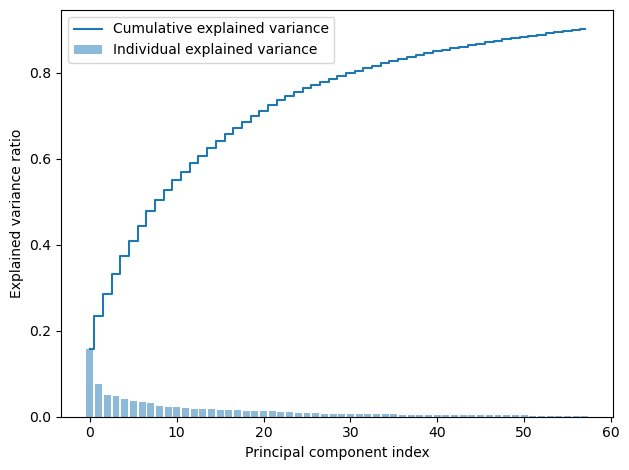

In [221]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)


# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

From the graph above we can see that we can explain about 80% of the information contained in the dataset by using about 30 variables.

In [229]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print (y_train_D.shape)
print(y_test_D.shape)

(3874, 58)
(969, 58)
(3874,)
(969,)


In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

In [223]:
# defining a fucntion to automate model fitting and scoring 

def models_automation(models, X_train, y_train,X_test,y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

In [224]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train_pca, y_train_D,X_test_pca,y_test_D)

LinearRegression: Train -> 0.38764219147166346, Test -> 0.37695585063133796
SGDRegressor: Train -> 0.38681047717767203, Test -> 0.3780593763181497
KNeighborsRegressor: Train -> 0.45601102715331177, Test -> 0.20119569474425458


c:\Users\usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Train -> 0.6256548648274971, Test -> 0.3354892603150631
DecisionTreeRegressor: Train -> 1.0, Test -> -0.2706474065496747
RandomForestRegressor: Train -> 0.8983461358435375, Test -> 0.27084878223910713


The evaluation of the regression models shows a mixed performance. Models like Linear Regression and SGDRegressor perform decently on both training and test datasets, with similar R-squared values. However, KNeighborsRegressor and MLPRegressor seem to overfit, as their R-squared scores are significantly higher on the training data compared to the test data. DecisionTreeRegressor shows severe overfitting, with a perfect R-squared on the training set but a negative value on the test set. RandomForestRegressor performs well on the training data but also exhibits some overfitting. To address this, the next step involves reevaluating these models without PCA feature selection to potentially improve their performance and generalization.

In [225]:
models_automation(model_list, X_train_D, y_train_D,X_test_D,y_test_D)

LinearRegression: Train -> 0.5215740786017105, Test -> 0.5874227507776766
SGDRegressor: Train -> 0.4171259522753654, Test -> 0.39740580268177284
KNeighborsRegressor: Train -> 0.43334979645267524, Test -> 0.2320018160275681


c:\Users\usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Train -> 0.6815220793659139, Test -> 0.3972883194888085
DecisionTreeRegressor: Train -> 1.0, Test -> -0.1810128362027792
RandomForestRegressor: Train -> 0.9254120575823308, Test -> 0.4359296170863617


The latest evaluation of the regression models without PCA feature selection shows some changes in performance. LinearRegression and SGDRegressor still demonstrate decent results, with R-squared values around 0.52 to 0.42 for both training and test sets, indicating moderate fit. However, KNeighborsRegressor and MLPRegressor exhibit some overfitting, with noticeable gaps between their train and test R-squared scores. DecisionTreeRegressor continues to display severe overfitting, achieving a perfect R-squared on the training data but a negative value on the test data. RandomForestRegressor, although performing well on the training data, still shows signs of overfitting, albeit less pronounced than before. 

The performing model in this case is Linear Regression, ad it displayed the highest and most consistent scores for botht he test and train datasets.